In [1]:
import pandas as pd

# Load the dataset
file_path = 'kidney_disease.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [2]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [3]:
# Step 1: Check for null values
print("Null values in each column:\n", data.isnull().sum())

# Step 2: Check the unique values in the classification column
print("Unique values in 'classification':", data['classification'].unique())

# Step 3: Correct misclassifications
data['classification'] = data['classification'].str.strip()
data['classification'] = data['classification'].replace('ckd\t', 'ckd')
print("Unique values in 'classification' after correction:", data['classification'].unique())

Null values in each column:
 id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64
Unique values in 'classification': ['ckd' 'ckd\t' 'notckd']
Unique values in 'classification' after correction: ['ckd' 'notckd']


In [4]:
# Step 4: Identify and fix leading/trailing whitespace and spaces in object columns
def check_for_spaces(df):
    space_report = {}
    for col in df.select_dtypes(include='object').columns:
        trimmed = df[col].str.strip()
        mask = df[col] != trimmed
        space_report[col] = df.loc[mask, col]
    return space_report

# Check the dataframe for spaces
report_with_spaces = check_for_spaces(data)

# Output the report and clean the columns
for column, values in report_with_spaces.items():
    if not values.empty:
        print(f"Column '{column}' has leading/trailing spaces in the following rows:")
        print(values)
        data[column] = data[column].str.strip()
    else:
        print(f"Column '{column}' has no leading/trailing spaces.")

Column 'rbc' has leading/trailing spaces in the following rows:
0      NaN
1      NaN
5      NaN
6      NaN
10     NaN
      ... 
309    NaN
322    NaN
349    NaN
350    NaN
381    NaN
Name: rbc, Length: 152, dtype: object
Column 'pc' has leading/trailing spaces in the following rows:
5      NaN
13     NaN
17     NaN
21     NaN
28     NaN
      ... 
309    NaN
322    NaN
349    NaN
350    NaN
381    NaN
Name: pc, Length: 65, dtype: object
Column 'pcc' has leading/trailing spaces in the following rows:
290    NaN
300    NaN
316    NaN
328    NaN
Name: pcc, dtype: object
Column 'ba' has leading/trailing spaces in the following rows:
290    NaN
300    NaN
316    NaN
328    NaN
Name: ba, dtype: object
Column 'pcv' has leading/trailing spaces in the following rows:
13     NaN
16     NaN
17     NaN
23     NaN
28     NaN
      ... 
247    NaN
273    NaN
319    NaN
324    NaN
365    NaN
Name: pcv, Length: 72, dtype: object
Column 'wc' has leading/trailing spaces in the following rows:
6      N

In [5]:
# Check the dataframe for spaces
report_with_spaces = check_for_spaces(data)
print(report_with_spaces)

{'rbc': 0      NaN
1      NaN
5      NaN
6      NaN
10     NaN
      ... 
309    NaN
322    NaN
349    NaN
350    NaN
381    NaN
Name: rbc, Length: 152, dtype: object, 'pc': 5      NaN
13     NaN
17     NaN
21     NaN
28     NaN
      ... 
309    NaN
322    NaN
349    NaN
350    NaN
381    NaN
Name: pc, Length: 65, dtype: object, 'pcc': 290    NaN
300    NaN
316    NaN
328    NaN
Name: pcc, dtype: object, 'ba': 290    NaN
300    NaN
316    NaN
328    NaN
Name: ba, dtype: object, 'pcv': 13     NaN
16     NaN
17     NaN
23     NaN
28     NaN
      ... 
247    NaN
273    NaN
319    NaN
324    NaN
365    NaN
Name: pcv, Length: 70, dtype: object, 'wc': 6      NaN
10     NaN
13     NaN
16     NaN
17     NaN
      ... 
287    NaN
302    NaN
319    NaN
324    NaN
330    NaN
Name: wc, Length: 105, dtype: object, 'rc': 1      NaN
2      NaN
6      NaN
10     NaN
13     NaN
      ... 
287    NaN
302    NaN
319    NaN
324    NaN
330    NaN
Name: rc, Length: 130, dtype: object, 'htn': 288    NaN
29

In [6]:
import numpy as np

# Step 5: Replace '?' with NaN in specific columns
data['pcv'] = data['pcv'].replace('?', np.nan)
data['wc'] = data['wc'].replace('?', np.nan)
data['rc'] = data['rc'].replace('?', np.nan)

# Verify the unique values in the cleaned columns
print("Unique values in 'pcv':", data['pcv'].unique())
print("Unique values in 'wc':", data['wc'].unique())
print("Unique values in 'rc':", data['rc'].unique())

Unique values in 'pcv': ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
Unique values in 'wc': ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
Unique values in 'rc': ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3

In [7]:
# Step 6: Encode categorical variables using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded_cols = ['rbc', 'pc', 'pcc', 'ba', 'appet', 'htn', 'dm', 'cad', 'pe', 'ane', 'classification']
data[encoded_cols] = encoder.fit_transform(data[encoded_cols])

In [8]:
# # Step 6: Apply manual encoding for categorical columns
# data['rbc'] = data['rbc'].map({'normal': 0, 'abnormal': 1})
# data['pc'] = data['pc'].map({'normal': 0, 'abnormal': 1})
# data['pcc'] = data['pcc'].map({'notpresent': 0, 'present': 1})
# data['ba'] = data['ba'].map({'notpresent': 0, 'present': 1})
# data['appet'] = data['appet'].map({'poor': 0, 'good': 1})
# data['htn'] = data['htn'].map({'no': 0, 'yes': 1})
# data['dm'] = data['dm'].map({'no': 0, 'yes': 1})
# data['cad'] = data['cad'].map({'no': 0, 'yes': 1})
# data['pe'] = data['pe'].map({'no': 0, 'yes': 1})
# data['ane'] = data['ane'].map({'no': 0, 'yes': 1})
# data['classification'] = data['classification'].map({'notckd': 0, 'ckd': 1})

# Verify the unique values after encoding
print("Step 6: Unique values in 'rbc':", data['rbc'].unique())
print("Step 6: Unique values in 'pc':", data['pc'].unique())
print("Step 6: Unique values in 'pcc':", data['pcc'].unique())
print("Step 6: Unique values in 'ba':", data['ba'].unique())
print("Step 6: Unique values in 'appet':", data['appet'].unique())
print("Step 6: Unique values in 'htn':", data['htn'].unique())
print("Step 6: Unique values in 'dm':", data['dm'].unique())
print("Step 6: Unique values in 'cad':", data['cad'].unique())
print("Step 6: Unique values in 'pe':", data['pe'].unique())
print("Step 6: Unique values in 'ane':", data['ane'].unique())
print("Step 6: Unique values in 'classification':", data['classification'].unique())


Step 6: Unique values in 'rbc': [nan  1.  0.]
Step 6: Unique values in 'pc': [ 1.  0. nan]
Step 6: Unique values in 'pcc': [ 0.  1. nan]
Step 6: Unique values in 'ba': [ 0.  1. nan]
Step 6: Unique values in 'appet': [ 0.  1. nan]
Step 6: Unique values in 'htn': [ 1.  0. nan]
Step 6: Unique values in 'dm': [ 1.  0. nan]
Step 6: Unique values in 'cad': [ 0.  1. nan]
Step 6: Unique values in 'pe': [ 0.  1. nan]
Step 6: Unique values in 'ane': [ 0.  1. nan]
Step 6: Unique values in 'classification': [0. 1.]


In [9]:
print(data.dtypes)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification    float64
dtype: object


In [10]:
print(data[['pcv', 'wc', 'rc']].head())

  pcv    wc   rc
0  44  7800  5.2
1  38  6000  NaN
2  31  7500  NaN
3  32  6700  3.9
4  35  7300  4.6


In [11]:
print(data.dtypes)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification    float64
dtype: object


In [12]:
# Convert 'pcv', 'wc', and 'rc' columns to numeric
data[['pcv', 'wc', 'rc']] = data[['pcv', 'wc', 'rc']].apply(pd.to_numeric, errors='coerce')

In [13]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Step 7: Handle missing values using KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = knn_imputer.fit_transform(data[numerical_cols])

# Verify that there are no missing values left
print("Step 7: Null values after imputation:\n", data.isnull().sum())

Step 7: Null values after imputation:
 id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [14]:

# Step 8: Min-Max scaling for numerical features
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the pre|processed dataset
print("Step 8: First few rows of the preprocessed dataset:\n", data.head())

Step 8: First few rows of the preprocessed dataset:
          id       age        bp    sg   al   su  rbc   pc  pcc   ba  ...  \
0  0.000000  0.522727  0.230769  0.75  0.2  0.0  0.2  1.0  0.0  0.0  ...   
1  0.002506  0.056818  0.000000  0.75  0.8  0.0  0.4  1.0  0.0  0.0  ...   
2  0.005013  0.681818  0.230769  0.25  0.4  0.6  1.0  1.0  0.0  0.0  ...   
3  0.007519  0.522727  0.153846  0.00  0.8  0.0  1.0  0.0  1.0  0.0  ...   
4  0.010025  0.556818  0.230769  0.25  0.4  0.0  1.0  1.0  0.0  0.0  ...   

        pcv        wc        rc  htn   dm  cad  appet   pe  ane  \
0  0.777778  0.231405  0.525424  1.0  1.0  0.0    0.0  0.0  0.0   
1  0.644444  0.157025  0.250847  0.0  0.0  0.0    0.0  0.0  0.0   
2  0.488889  0.219008  0.247458  0.0  1.0  0.0    1.0  0.0  1.0   
3  0.511111  0.185950  0.305085  1.0  0.0  0.0    1.0  1.0  1.0   
4  0.577778  0.210744  0.423729  0.0  0.0  0.0    0.0  0.0  0.0   

   classification  
0             0.0  
1             0.0  
2             0.0  
3      

In [15]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Separate features and target, excluding 'id'
X = data.drop(columns=['classification', 'id'])
y = data['classification']

Training set shape: (240, 24)
Validation set shape: (80, 24)
Test set shape: (80, 24)
Resampled class distribution:
 classification
0.0    150
1.0    150
Name: count, dtype: int64


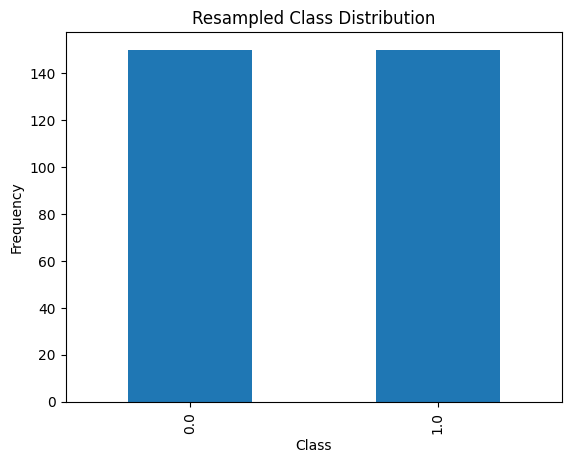

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Further split the training data to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)  # 0.25 x 0.8 = 0.2, so val set is 20% of original data

# Display the shapes of the training, validation, and test sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# 5. Apply SMOTE to handle class imbalance (only on training data)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 6. Check the distribution of the resampled target variable
resampled_class_distribution = y_train_resampled.value_counts()
print("Resampled class distribution:\n", resampled_class_distribution)

# Plot the resampled class distribution
resampled_class_distribution.plot(kind='bar')
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()